# **Installing Libraries**

In [ ]:
pip install pandas numpy matplotlib seaborn

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Datasets**

In [ ]:
# Load datasets
flights_df = pd.read_csv('Flights.csv')
tickets_df = pd.read_csv('Tickets.csv')
airport_codes_df = pd.read_csv('Airport_Codes.csv')

<ipython-input-8-48a6f170b2a8>:2: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('Flights.csv')


# **Data Quality Checks**

###**Data Wrangling on FLIGHTS**

In [ ]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [ ]:
# Kepping only rows where flights are not cancelled
flights_df = flights_df[flights_df['CANCELLED'] == 0]

# Reseting the index in place
flights_df.reset_index(drop=True, inplace=True)

**Changing Data Types Format (FLIGHTS)**

We need to change the format for FL_DATE

We need to change AIR_TIME & DISTANCE from 'object' to 'int'

In [ ]:
# Changing 'FL_DATE' data format
flights_df['FL_DATE'].unique() # to check current format

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-26',
       '2019-02-27', '2019-02-28', '2019-02-01', '2019-02-02',
       '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
       '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14',
       '2019-02-15', '2019-02-16', '2019-02-25', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [ ]:
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'], format='%Y-%m-%d', errors='coerce')

# Converting remaining NaT usning '%m/%d/%y' format
flights_df['FL_DATE'] = flights_df['FL_DATE'].combine_first(pd.to_datetime(flights_df['FL_DATE'], format='%m/%d/%y', errors='coerce'))

# Converting all dates to 'YYYY-MM-DD' format as strings
flights_df['FL_DATE'] = flights_df['FL_DATE'].dt.strftime('%Y-%m-%d')

In [ ]:
flights_df['FL_DATE'].unique()

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-26',
       '2019-02-27', '2019-02-28', '2019-02-01', '2019-02-02',
       '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
       '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14',
       '2019-02-15', '2019-02-16', '2019-02-25', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [ ]:
# Change character datatypes to INT/FLOAT
def to_number(dataset, field_names):
  for field_name in field_names:
    dataset[field_name] = pd.to_numeric(dataset[field_name], errors='coerce')
  return dataset

In [ ]:
# Lets convert character fields to numbers
field_names = ['AIR_TIME', 'DISTANCE']
flights_df = to_number(flights_df, field_names)

In [ ]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864272 entries, 0 to 1864271
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           float64
 14  DISTANCE           float64
 15  OCCUPANCY_RATE     float64
dtypes: float64(6), int64(2), object(8)
memory usage: 227.6+ MB


In [ ]:
# Optimizing data types
def optimize_data_types(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'object':
          df[col] = df[col].fillna('null')
    return df

In [ ]:
# Lets optimize the flights' datatypes
flights_df = optimize_data_types(flights_df)
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864272 entries, 0 to 1864271
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int32  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int32  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float32
 11  ARR_DELAY          float32
 12  CANCELLED          float32
 13  AIR_TIME           float32
 14  DISTANCE           float32
 15  OCCUPANCY_RATE     float32
dtypes: float32(6), int32(2), object(8)
memory usage: 170.7+ MB


###**Check For Duplicates (FLIGHTS)**

In [ ]:
# Identifying the duplicate rows
duplicate_rows = flights_df.duplicated()
duplicate_rows.unique()

array([False,  True])

In [ ]:
# Looks like we have some duplicates
flights_df.duplicated().sum()

4410

In [ ]:
# We have 4410 duplicated rows. We can proceed to dropping them, with respect to all columns
flights_df.drop_duplicates(inplace=True)

In [ ]:
flights_df.info() # Index shifts from 1864272 to 1859862

<class 'pandas.core.frame.DataFrame'>
Index: 1859862 entries, 0 to 1859861
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int32  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int32  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float32
 11  ARR_DELAY          float32
 12  CANCELLED          float32
 13  AIR_TIME           float32
 14  DISTANCE           float32
 15  OCCUPANCY_RATE     float32
dtypes: float32(6), int32(2), object(8)
memory usage: 184.5+ MB


In [ ]:
# Lets check on null values in each column
flights_df.isnull().sum()

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


Columns with missing values: DEP_DELAY, ARR_DELAY, AIR_TIME, DISTANCE, & OCCUPANCY_RATE

In [ ]:
# Lets dive into the columns
flights_df_missing = flights_df[['DEP_DELAY','ARR_DELAY','AIR_TIME','DISTANCE','OCCUPANCY_RATE']]
flights_df_missing

,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,-8.0,-6.0,143.0,1025.0,0.970000
1,1.0,5.0,135.0,930.0,0.550000
2,0.0,4.0,132.0,930.0,0.910000
3,11.0,14.0,136.0,930.0,0.670000
4,0.0,-17.0,151.0,1005.0,0.620000
...,...,...,...,...,...
1859857,-9.0,-6.0,112.0,NaN,0.794885
1859858,-2.0,-1.0,106.0,NaN,0.538399
1859859,-8.0,-25.0,106.0,NaN,0.955579
1859860,-9.0,-6.0,112.0,NaN,0.595344


In [ ]:
# We can visualize for a better view of the data
missing_values = flights_df_missing.isnull().sum()

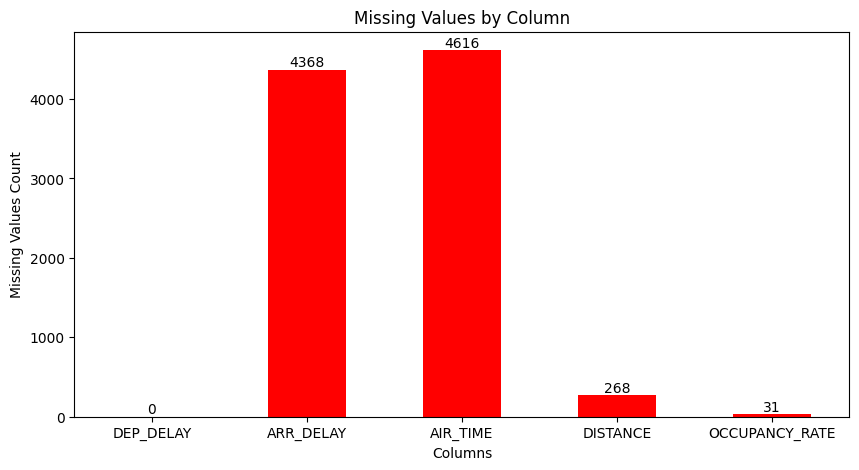

In [ ]:
# Lets plot a bar chat for the missing value counts

fig, ax = plt.subplots(figsize=(10, 5))

# Creating the bar chart
bars = missing_values.plot(kind='bar', color='red', ax=ax, label='count')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=0)

# Adding labels to each bar
ax.bar_label(bars.containers[0], label_type='edge')

plt.show()

Check for outliers

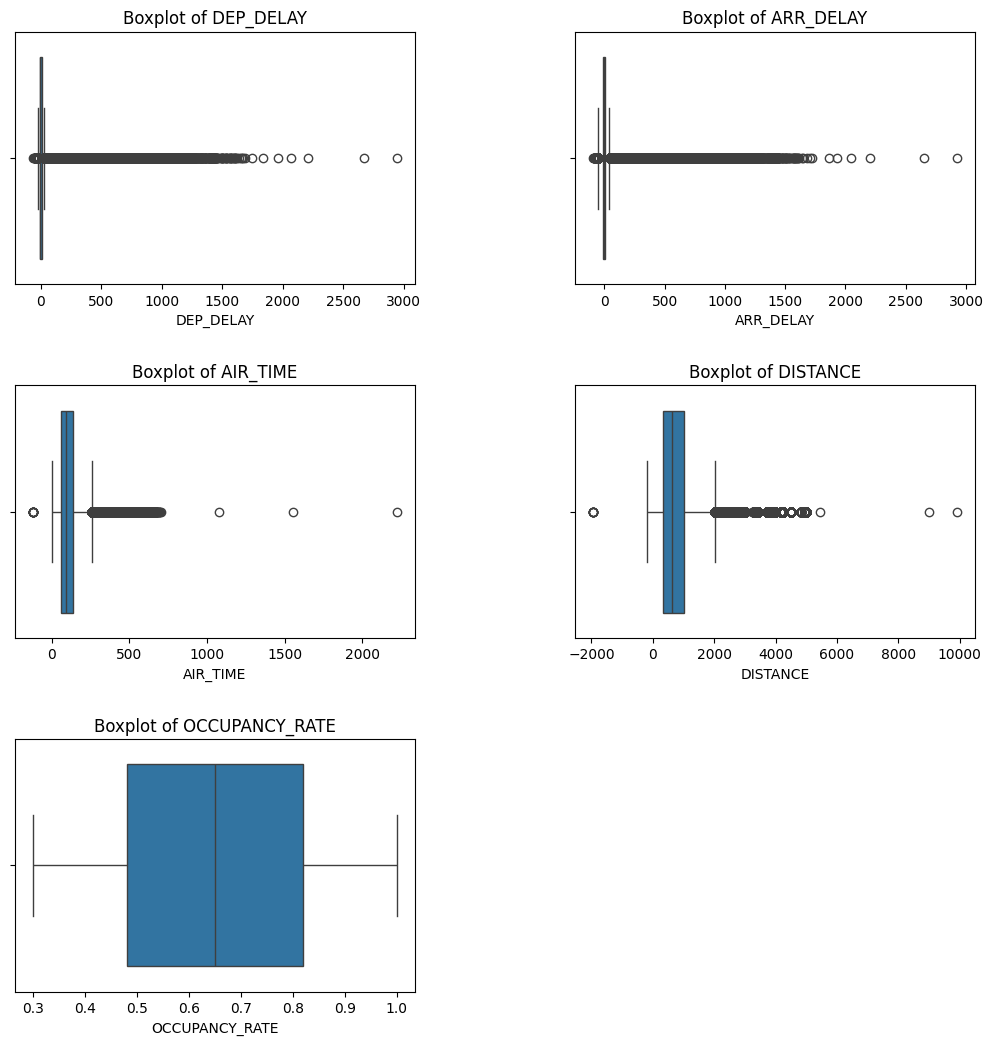

In [ ]:
# Show boxplots for each columns, taking into account all rows
num_cols = len(flights_df_missing.columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 12))

# Create separate boxplot for each column and show the layout based on the number of columns
for i, col in enumerate(flights_df_missing.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.boxplot(x=flights_df_missing[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

# plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

- There are notable outliers in all the boxplots except the OCCUPANCY_RATE's.
- The columns with outliers will need their values to be replaced. For this, we will use the Median Imputation method.
- Why? because the Mean imputation can be influenced by outliers, while the Median imputation is more robust in the presence of outliers.

In [ ]:
# Lets take care of the outliers by using the median imputation

import pandas as pd
import numpy as np

def clean_flights_data(flights_df):

    # Identify numerical columns for cleaning
    numerical_cols = flights_df.select_dtypes(include=['float64', 'int64']).columns

    for col in numerical_cols:
        # Impute missing values with median
        median_value = flights_df[col].median()
        flights_df[col].fillna(median_value, inplace=True)

        # Detect outliers using IQR
        Q1 = flights_df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = flights_df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with 0
        flights_df[col] = flights_df[col].apply(lambda x: 0 if x < lower_bound or x > upper_bound else x)

    return flights_df


flights_df_cleaned = clean_flights_data(flights_df)

<ipython-input-112-ad8192ca9140>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights_df[col].fillna(median_value, inplace=True)
<ipython-input-112-ad8192ca9140>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# Lets check
flights_df.isna().sum()

,0
FL_DATE,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0
DEST_AIRPORT_ID,0
DESTINATION,0
DEST_CITY_NAME,0


###**Data Wrangling on TICKETS**

In [ ]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


###**Changing Data Types (TICKETS)**

We need to change the data types and filter for round trips

In [ ]:
# Changing the data type for ITIN_FARE from 'object' to 'float'
tickets_df['ITIN_FARE'] = pd.to_numeric(tickets_df['ITIN_FARE'], errors='coerce')

In [ ]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1163149 non-null  float64
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 106.9+ MB


In [ ]:
# Filtering for roundtrips
tickets_df = tickets_df[tickets_df['ROUNDTRIP'] == 1].reset_index(drop=True)

tickets_df['ROUNDTRIP'].unique()

array([1.])

###**Check For Duplicates (TICKETS)**

In [ ]:
# Lets check for any duplicates
tickets_df.duplicated().sum()

47564

In [ ]:
# There are 47564 duplicates. We need to drop them.
tickets_df = tickets_df.drop_duplicates()

In [ ]:
# Lets check for null values
tickets_df.isnull().sum()

,0
ITIN_ID,0
YEAR,0
QUARTER,0
ORIGIN,0
ORIGIN_COUNTRY,0
ORIGIN_STATE_ABR,0
ORIGIN_STATE_NM,0
ROUNDTRIP,0
REPORTING_CARRIER,0
PASSENGERS,960


- PASSENGERS & ITIN_FARE have null values
- We need to check for outliers

In [ ]:
# Lets dive into the columns
tickets_df_missing = tickets_df[['PASSENGERS','ITIN_FARE']]
tickets_df_missing

,PASSENGERS,ITIN_FARE
0,1.0,736.0
1,1.0,570.0
2,1.0,564.0
3,1.0,345.0
4,1.0,1647.0
...,...,...
672773,1.0,585.0
672775,1.0,692.0
672776,1.0,600.0
672778,1.0,705.0


In [ ]:
# We can visualize for a better view of the data
missing_values = tickets_df_missing.isnull().sum()

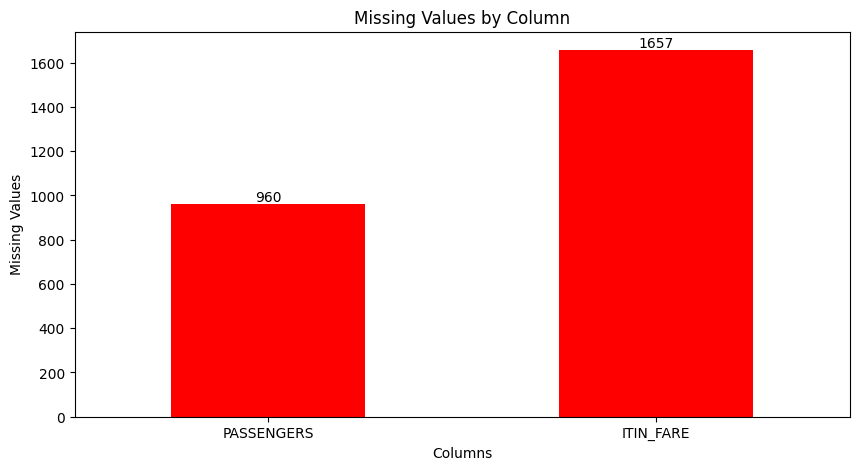

In [ ]:
# Plot bar chart of missing value counts

fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar chart
bars = missing_values.plot(kind='bar', color='red', ax=ax, label='count')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.xticks(rotation=0)

# Add labels to each bar
ax.bar_label(bars.containers[0], label_type='edge')

plt.show()

Lets check for outliers in the Tickets column

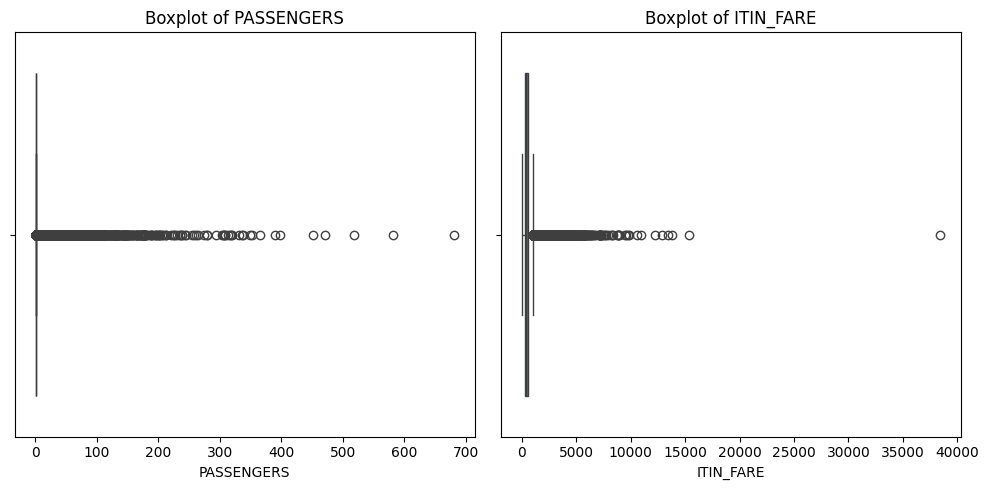

In [ ]:
# Showing boxplots for each column, taking into account all rows.
num_cols = len(tickets_df_missing.columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(10, 5))

# Create separate boxplot for each column and show the layout
for i, column in enumerate(tickets_df_missing.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=tickets_df_missing[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

- There are notable outliers seen in both PASSENGERS & ITIN_FARE boxplots.
- We will use the Median Imputation method to take care of the outliers

In [ ]:
# Let's take care of the outliers by using the median imputation

def clean_tickets_data(tickets_df):

    # Identify numerical columns for cleaning
    numerical_cols = tickets_df.select_dtypes(include=['float64', 'int64']).columns

    for col in numerical_cols:
      # Impute missing values with median
        median_value = tickets_df[col].median()
        tickets_df[col].fillna(median_value, inplace=True)

        # Detect outliers using IQR
        Q1 = tickets_df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = tickets_df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with 0
        tickets_df[col] = tickets_df[col].apply(lambda x: 0 if x < lower_bound or x > upper_bound else x)

    return tickets_df


tickets_df_cleaned = clean_tickets_data(tickets_df)

<ipython-input-131-7f8b69ca6947>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tickets_df[col].fillna(median_value, inplace=True)
<ipython-input-131-7f8b69ca6947>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# Let's check
tickets_df.isna().sum()

,0
ITIN_ID,0
YEAR,0
QUARTER,0
ORIGIN,0
ORIGIN_COUNTRY,0
ORIGIN_STATE_ABR,0
ORIGIN_STATE_NM,0
ROUNDTRIP,0
REPORTING_CARRIER,0
PASSENGERS,0


###**Data Wrangling on AIRPORT_CODES**

In [ ]:
airport_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


### **Changing Data Types (AIRPORT_CODES)**

We need to optimize the data types

In [ ]:
def optimize_data_types(df):
    for col in df.columns:
      if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
      elif df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')
      elif df[col].dtype == 'object':
        # Replacing NaN values with "null" for object type column
        df[col] = df[col].fillna('null')
    return df

In [ ]:
airport_codes_df = optimize_data_types(airport_codes_df)
airport_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float32
 3   CONTINENT     55369 non-null  object 
 4   ISO_COUNTRY   55369 non-null  object 
 5   MUNICIPALITY  55369 non-null  object 
 6   IATA_CODE     55369 non-null  object 
 7   COORDINATES   55369 non-null  object 
dtypes: float32(1), object(7)
memory usage: 3.2+ MB


We have to now filter for medium and large airports within the US

In [ ]:
# Filtering by TYPE, where type is 'medium_airport' or 'large_airport'
airport_codes_df = airport_codes_df[airport_codes_df['TYPE'].isin(['medium_airport', 'large_airport'])]

In [ ]:
# Let's check the filter was applied
airport_codes_df['TYPE'].unique()

array(['medium_airport', 'large_airport'], dtype=object)

In [ ]:
# Look at rows where ISO_COUNTRY is 'US', the reset the index.
airport_codes_df = airport_codes_df[airport_codes_df['ISO_COUNTRY'] == 'US']
airport_codes_df.reset_index(drop=True, inplace=True)

Let's check data types for airport_codes

In [ ]:
airport_codes_df.dtypes

,0
TYPE,object
NAME,object
ELEVATION_FT,float32
CONTINENT,object
ISO_COUNTRY,object
MUNICIPALITY,object
IATA_CODE,object
COORDINATES,object


Let's check duplicates for airport_codes

In [ ]:
duplicated_rows = airport_codes_df.duplicated()
duplicated_rows.unique()

array([False])

Looks like there are no duplicate rows in the data

Let's check for null values

In [ ]:
airport_codes_df.isnull().sum()

,0
TYPE,0
NAME,0
ELEVATION_FT,3
CONTINENT,0
ISO_COUNTRY,0
MUNICIPALITY,0
IATA_CODE,0
COORDINATES,0


- There are some columns we need to drop as they aren't relevant nor required for our analysis, including ELEVATION_FT column.
- We will retain NAME and IATA_CODES columns.

In [ ]:
airport_codes_df = airport_codes_df.drop(columns=['CONTINENT','ISO_COUNTRY','MUNICIPALITY','COORDINATES','ELEVATION_FT'],axis = 1)

In [ ]:
def plot_bar_with_percentage(data, column_name):

    # Counting the occurance of each value in the specified column
    counts = data[column_name].value_counts()
    total_count = counts.sum()

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts.values, color='green')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name} Values')
    plt.xticks(rotation=0)

    # Adding percentage data labels on top of each bar
    for bar in bars:
      yval = bar.get_height()
      percent = (yval / total_count) * 100
      plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percent:.1f}%', ha='center', va='bottom')

    plt.show()

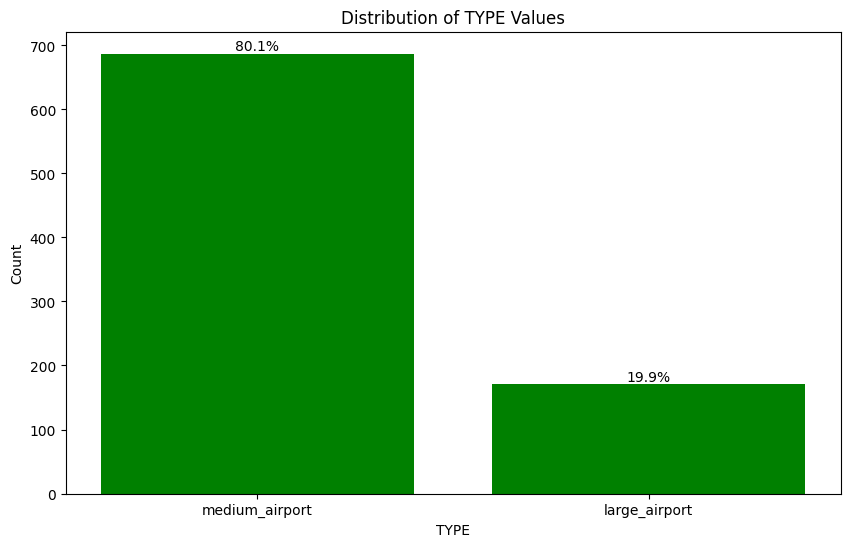

In [ ]:
# Plotting the bar chart
plot_bar_with_percentage(airport_codes_df, 'TYPE')

The visualization shows that we have approximately 80% of flights from medium airports, and 20% of flights from large airports.

#**Joins**

- To improve efficiency, we’ll aggregate the tickets and flights data by origin and destination, calculating key metrics like the mean.
- This approach reduces both time and complexity in merging.
- After aggregating each dataset separately, we’ll merge them with the airport_codes data, minimizing redundant computations and optimizing the process overall.

In [ ]:
tickets_df=tickets_df.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_STATE_NM':'first',
                                                   'PASSENGERS': np.sum,
                                                   'ITIN_FARE': np.sum}).reset_index()

## 'CANCELLER' is excluded but still taking count as it is still usable to find total number of flights in the route
flights_df=flights_df.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_CITY_NAME':'first',
                                                                        'DEST_CITY_NAME': 'first',
                                                                        'DEP_DELAY': np.sum,
                                                                        'ARR_DELAY': np.sum,
                                                                        'AIR_TIME': np.sum,
                                                                        'DISTANCE': np.sum,
                                                                        'OCCUPANCY_RATE':np.sum,
                                                                        'CANCELLED':'count'}).reset_index()

<ipython-input-155-22f7f9e49453>:1: FutureWarning: The provided callable <function sum at 0x7f48fe9bc670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tickets_df=tickets_df.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_STATE_NM':'first',
<ipython-input-155-22f7f9e49453>:6: FutureWarning: The provided callable <function sum at 0x7f48fe9bc670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  flights_df=flights_df.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_CITY_NAME':'first',


In [ ]:
# Merging tickets with flights: origin and destination
final = tickets_df.merge(flights_df, on=['ORIGIN', 'DESTINATION'], suffixes=('_tickets', '_flights'))

# Merging with airport_codes: origin airport details
final = final.merge(airport_codes_df, left_on='ORIGIN', right_on='IATA_CODE', suffixes=('', '_origin'))

# Merging with airport_codes: destination airport details
final = final.merge(airport_codes_df, left_on='DESTINATION', right_on='IATA_CODE', suffixes=('_origin', '_destination'))

# Droping unnecessary columns
final.drop(columns=['IATA_CODE_origin', 'IATA_CODE_destination'], inplace=True)

# Renaming columns if necessary
final.rename(columns={'CANCELLED': 'total_count'}, inplace=True)

# Creating route column
final['route'] = final['ORIGIN_CITY_NAME'] + ' TO ' + final['DEST_CITY_NAME']

# Create a copy of final data for safety
final_data = final.copy()

In [ ]:
# Let's check our final data
final_data.dtypes

,0
ORIGIN,object
DESTINATION,object
ORIGIN_STATE_NM,object
PASSENGERS,float64
ITIN_FARE,float64
ORIGIN_CITY_NAME,object
DEST_CITY_NAME,object
DEP_DELAY,float64
ARR_DELAY,float64
AIR_TIME,float64


#**Final Analysis**

####1) The 10 busiest round trip routes in terms of number of round trip flights in the quarter. (excluding canceled flights)

<ipython-input-158-59109093822a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='route', y='OCCUPANCY_RATE', data=top_routes, palette='deep')
<ipython-input-158-59109093822a>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust rotation and alignment of x-axis labels


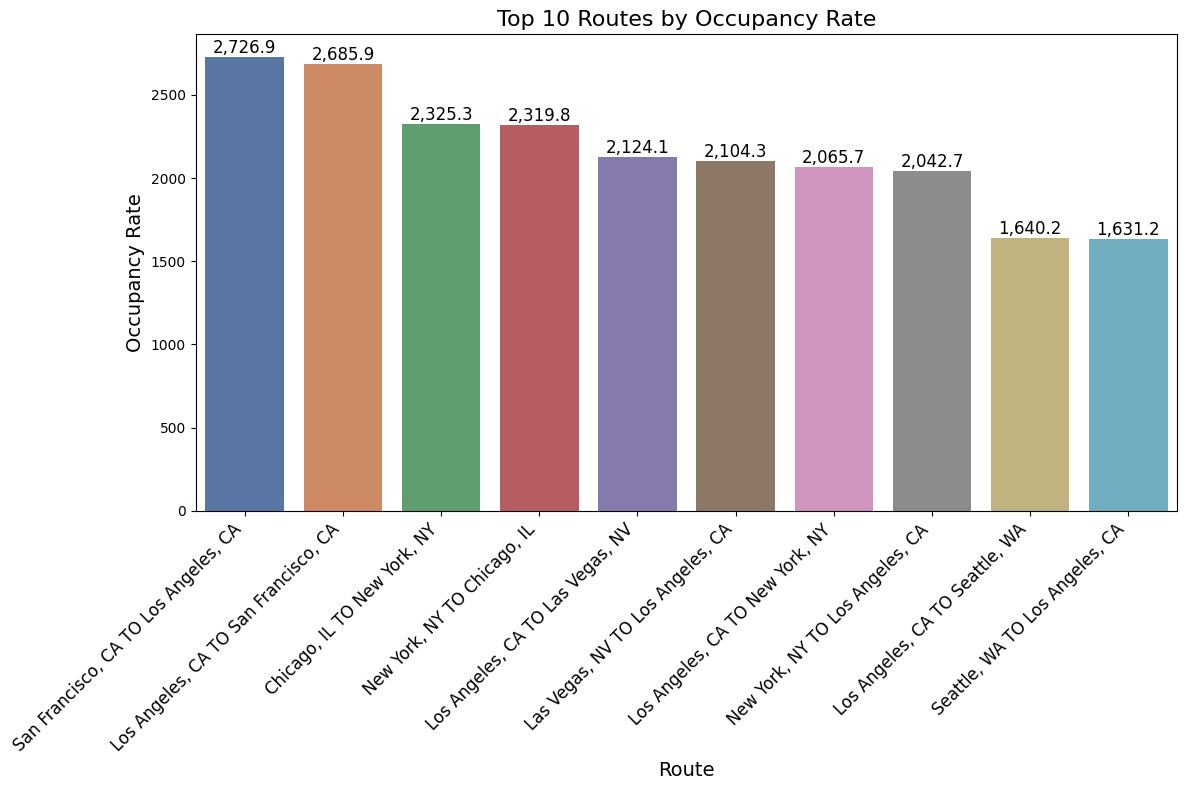

In [ ]:
# Lets sort the data to get top 10 routes with highest occupancy rates
top_routes = final_data.sort_values(by='OCCUPANCY_RATE', ascending=False).head(10)

# Creating the bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='OCCUPANCY_RATE', data=top_routes, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust rotation and alignment of x-axis labels
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Occupancy Rate', fontsize=14)
ax.set_title('Top 10 Routes by Occupancy Rate', fontsize=16)

# Add data labels with thousands separator
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position of the label
        p.get_height(),                 # Y position of the label
        f'{p.get_height():,.1f}',       # Format with a thousands separator and one decimal place
        ha='center', va='bottom',       # Center the text horizontally and align it to the bottom
        fontsize=12, color='black'      # Adjust font size and color as needed
    )

plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

- The bar chart reveals varying occupancy rates across the top 10 routes, highlighting differences in passenger demand.
- Routes with high occupancy rates indicate strong demand and potential profitability, suggesting they could benefit from increased flight frequency or capacity.
- However, routes with lower occupancy may need re-evaluation, as they might be underutilized.
- This data provides a valuable basis for optimizing route selection and resource allocation to improve overall profitability and align operations with demand patterns.

#### 2) The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.

In [ ]:
final_data['total_revenue'] = final_data['ITIN_FARE'] * final_data['PASSENGERS']

In [ ]:
## final_data calculations.
final_data['total_fare']=final_data['PASSENGERS']*final_data['ITIN_FARE']
final_data['baggage_cost']=final_data['OCCUPANCY_RATE']*70*0.5
final_data['arr_delay_cost']=final_data['ARR_DELAY']*75
final_data['dep_delay_cost']=final_data['DEP_DELAY']*75
final_data['airport_cost']=np.where((final_data['TYPE_origin']=='medium_airport'),final_data['total_count']*5000 , final_data['total_count']*10000)
final_data['airport_cost']=np.where((final_data['TYPE_destination']=='medium_airport'),final_data['airport_cost']+final_data['total_count']*5000 , final_data['airport_cost']+final_data['total_count']*10000)
final_data['essentials_cost']=final_data['DISTANCE']*9.18
final_data['income']=final_data['total_fare']+final_data['baggage_cost']
final_data['cost']=final_data['arr_delay_cost']+final_data['dep_delay_cost']+final_data['airport_cost']+final_data['essentials_cost']

**Profit by route per quarter**

<ipython-input-185-4485278f5dbc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='route', y='profit', data=top_routes_profit, palette='deep')
<ipython-input-185-4485278f5dbc>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


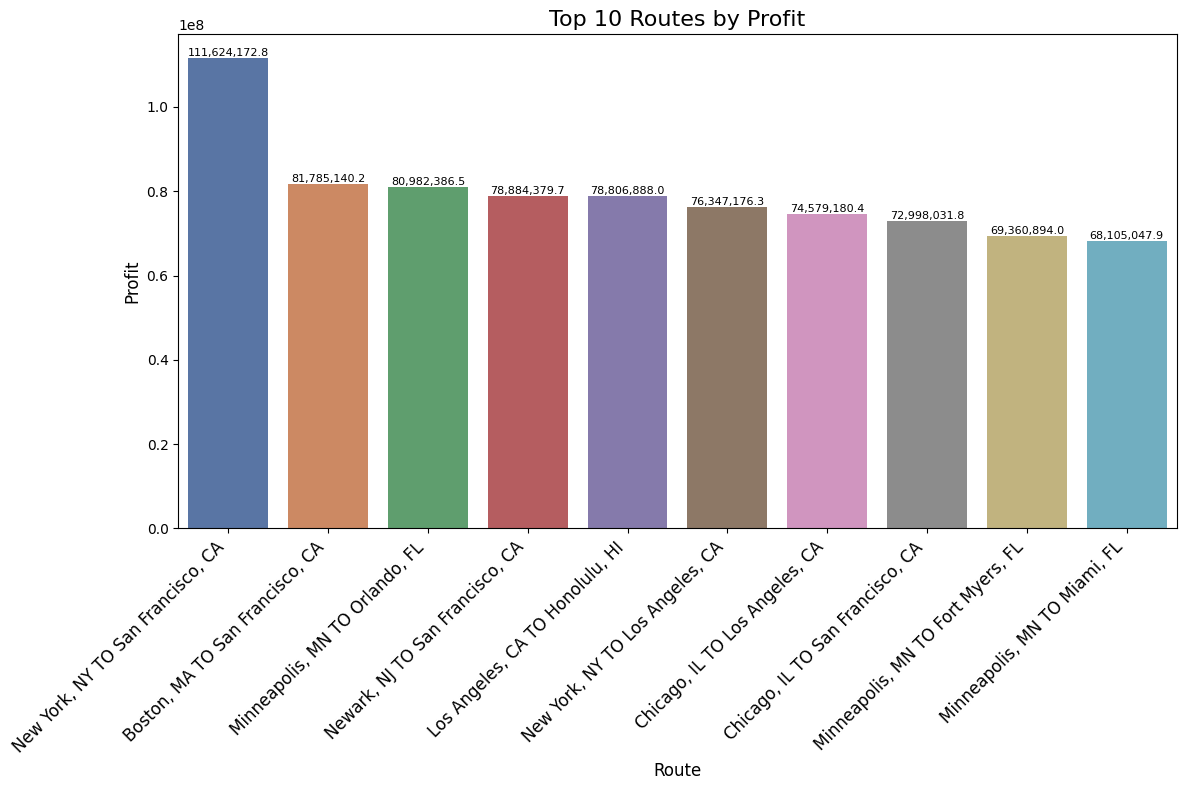

In [ ]:
final_data['profit']=final_data['income']-final_data['cost']
# Sorting data to get top 10 routes with highest profit
top_routes_profit = final_data.sort_values(by='profit', ascending=False).head(10)

# Creating bar chart with seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='profit', data=top_routes_profit, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.set_title('Top 10 Routes by Profit', fontsize=16)

# Adding labels to the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.1f}',
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

**Profit by route per roundtrip**

<ipython-input-190-191e96b8b0ba>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='route', y='profit_per_trip', data=top_routes, palette='deep')
<ipython-input-190-191e96b8b0ba>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


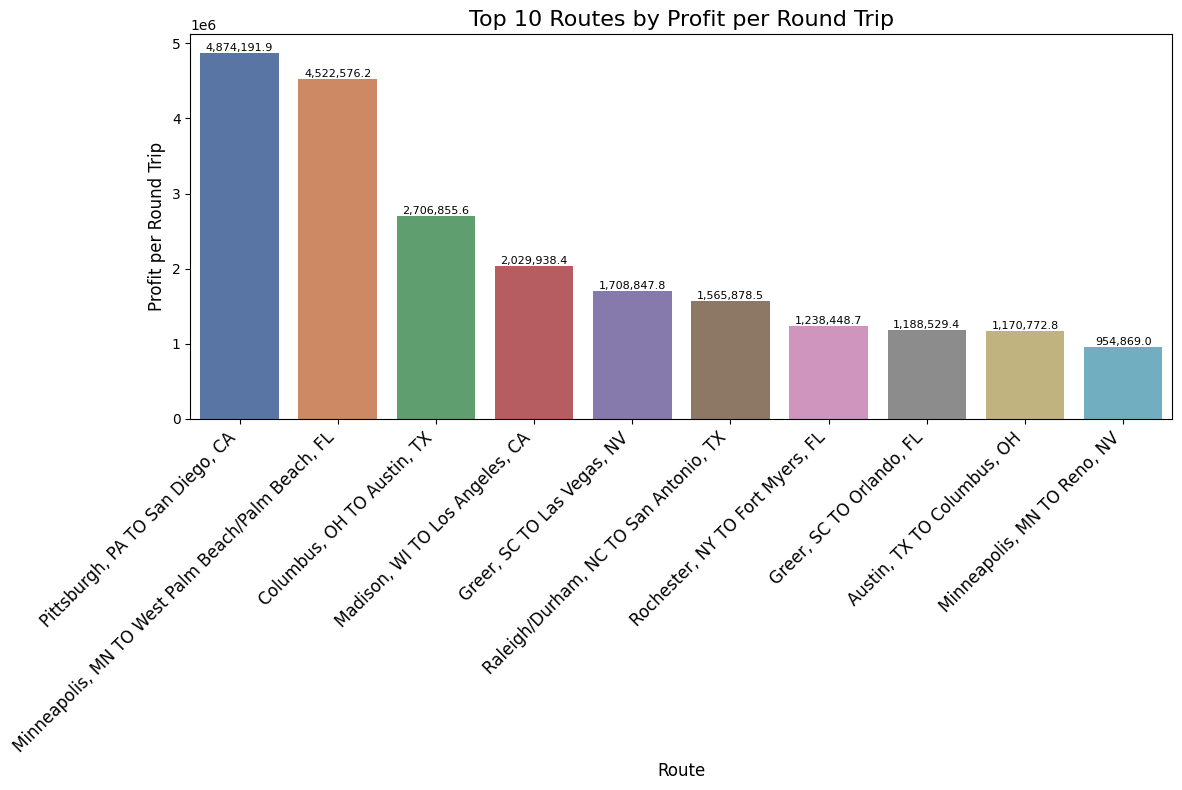

In [ ]:
# Calculating profit per trip
final_data['profit_per_trip'] = final_data['profit'] / final_data['total_count']

# Select top 10 routes by profit per trip
top_routes = final_data.sort_values(by='profit_per_trip', ascending=False).head(10)


# Creating bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='profit_per_trip', data=top_routes, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Profit per Round Trip', fontsize=12)
ax.set_title('Top 10 Routes by Profit per Round Trip', fontsize=16)

# Adding labels to the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.1f}',
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

- To gain a better perspective of our market strategy and revenue potential, it is essential to refine our analysis.

- While identifying the busiest round-trip routes offers valuable insights, focusing on profitability will help us uncover more actionable opportunities.

- We can enhance our approach by categorizing airports based on their operational activity. This includes determining which airports qualify as "busy," allowing us to prioritize efforts that maximize both customer engagement and revenue growth.

**Identifying 'BUSY' Airports**

In [ ]:
# Let's identify busy routes based on a threshold of 600 total flights
final_data['busy_route'] = np.where(final_data['total_count'] >= 600, 1, 0)

**Profit generated By Route For Round Trip At Busy Airports**

<ipython-input-188-2d6a74179ba7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='route', y='profit_per_trip', data=top_profitable_routes, palette='deep')
<ipython-input-188-2d6a74179ba7>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


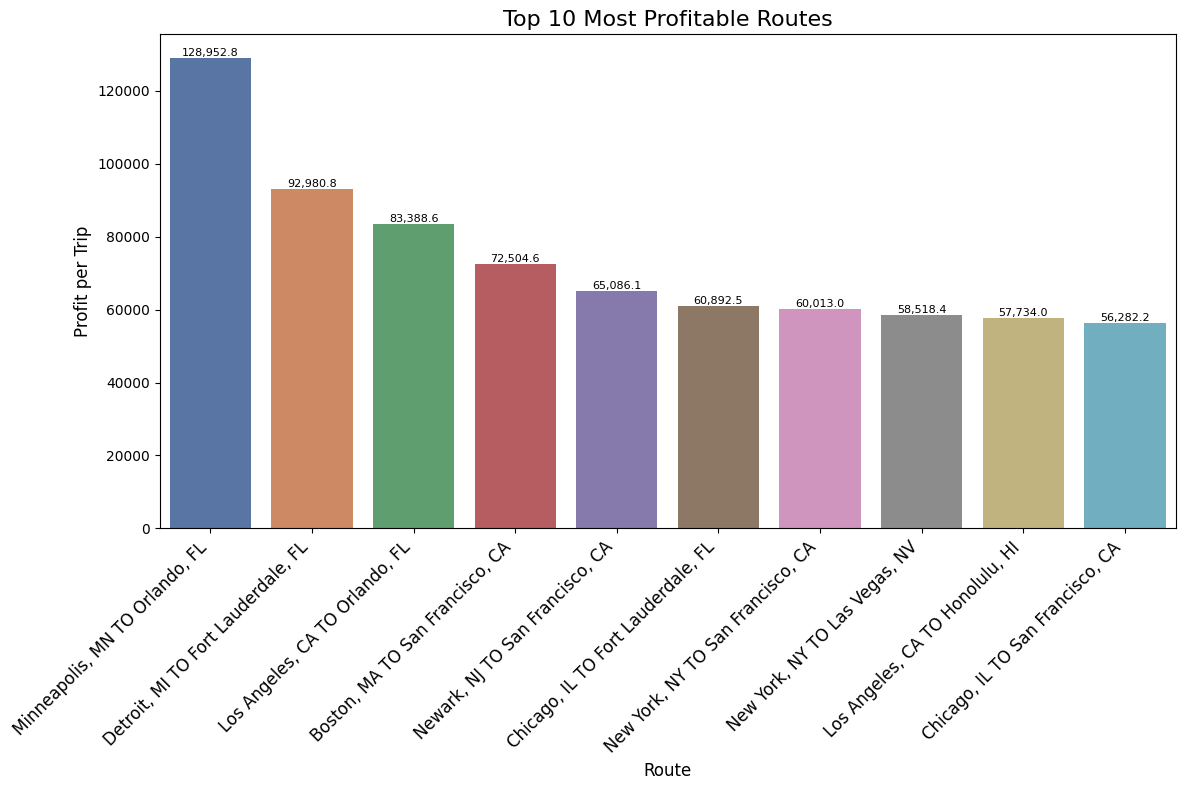

In [ ]:
# Filtering the data for the top 10 most profitable routes
top_profitable_routes = final_data[final_data['busy_route'] == 1].sort_values(by='profit_per_trip', ascending=False).head(10)



plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='profit_per_trip', data=top_profitable_routes, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Profit per Trip', fontsize=12)
ax.set_title('Top 10 Most Profitable Routes', fontsize=16)

# Adding labels to the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.1f}',
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

**Delays In Busy Routes**

<ipython-input-192-c1c9aa314176>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='route', y='total_delay', data=top_routes_delay, palette='deep')
<ipython-input-192-c1c9aa314176>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)


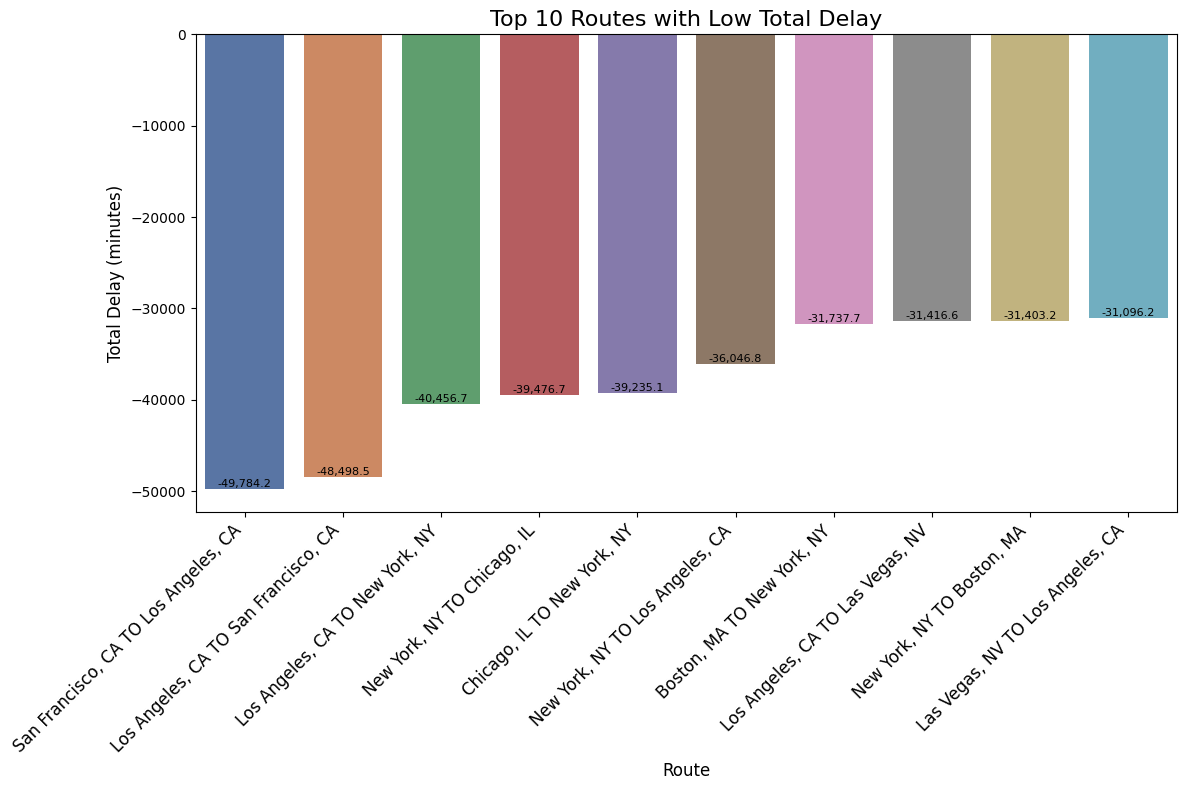

In [ ]:
# Calculating total delay combining departure and arrival delays
final_data['total_delay'] = final_data['DEP_DELAY'] + final_data['ARR_DELAY']

# Filtering data for the busiest routes
busiest_routes = final_data[final_data['busy_route'] == 1]

# Selecting the top 10 routes with the lowest total delay
top_routes_delay = busiest_routes.sort_values(by='total_delay', ascending=True).head(10)

# Creating a bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='total_delay', data=top_routes_delay, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Total Delay (minutes)', fontsize=12)
ax.set_title('Top 10 Routes with Low Total Delay', fontsize=16)

# Adding labels to the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.1f}',
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

**Top 10 Routes**

We are assuming the following;
- Delay: 40%
- Total Flights: 30%
- Profitability: 30%

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Selecting the data for busy routes
busy_routes_data = final_data[final_data['busy_route'] == 1]

# Selecting the columns to scale and transform
columns_to_scale = ['total_delay', 'profit_per_trip', 'total_count']
scaled_data = min_max_scaler.fit_transform(busy_routes_data[columns_to_scale])

# Inverse transform and assign scaled values back to DataFrame
busy_routes_data['delay_scaled'] = 1 - scaled_data[:, 0]
busy_routes_data['profit_per_trip_scaled'] = scaled_data[:, 1]
busy_routes_data['total_count_scaled'] = scaled_data[:, 2]

# Calculating score based on weighted average
busy_routes_data['score'] = 0.33 * busy_routes_data['delay_scaled'] + \
                           0.33 * busy_routes_data['profit_per_trip_scaled'] + \
                           0.33 * busy_routes_data['total_count_scaled']

<ipython-input-193-7f2613bd56d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busy_routes_data['delay_scaled'] = 1 - scaled_data[:, 0]
<ipython-input-193-7f2613bd56d5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busy_routes_data['profit_per_trip_scaled'] = scaled_data[:, 1]
<ipython-input-193-7f2613bd56d5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-194-fbc31de43154>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='route', y='score', data=top_routes, palette='deep')
<ipython-input-194-fbc31de43154>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)


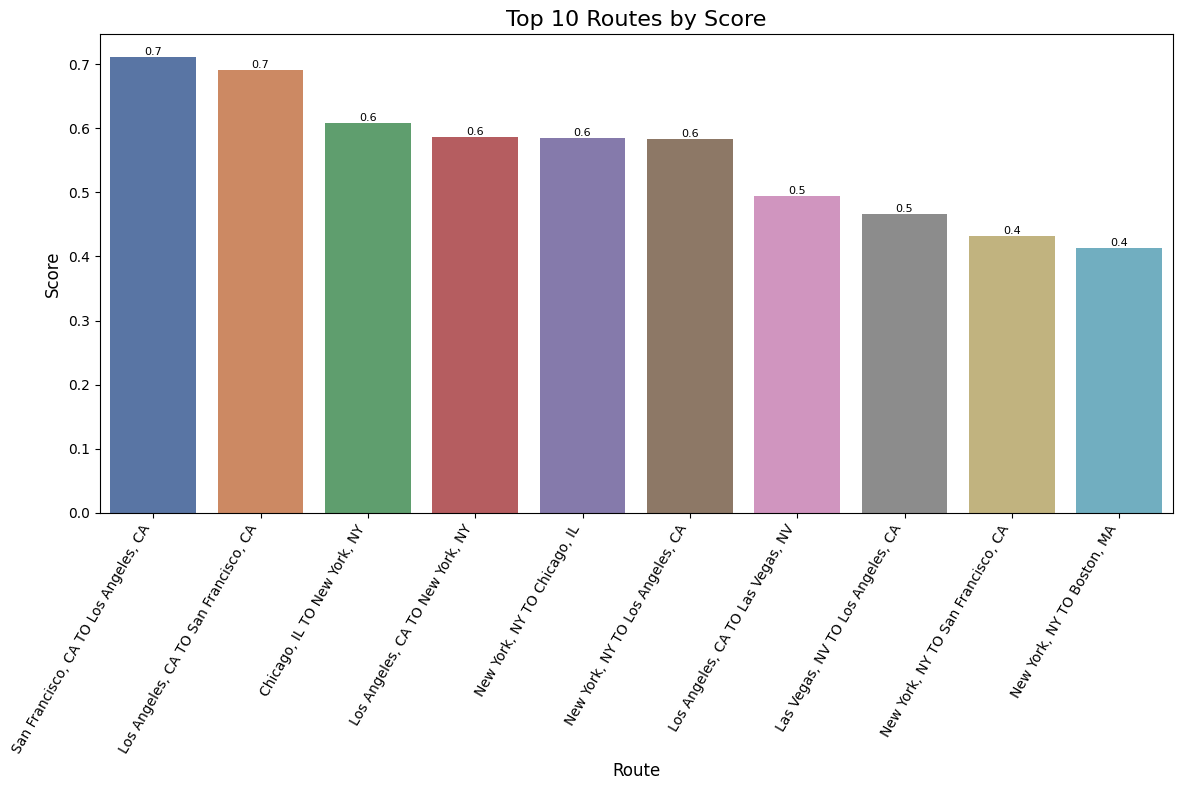

In [ ]:
# Sorting 'temp' by 'score' in descending order to get top 10 routes
top_routes = busy_routes_data.sort_values(by='score', ascending=False).head(10)

# Creating a bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='score', data=top_routes, palette='deep')
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)
ax.set_title('Top 10 Routes by Score', fontsize=16)

# Adding labels to the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.1f}',
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

The top 10 routes appear to be
- 10) San Francisco, CA to Los Angeles, CA **with a score of 70%**
- 9) Los Angeles, CA to San Francisco, CA **with a score of 70%**
- 8) Chicago, IL to New York, NY **with a score of 60%**
- 7) Los Angeles, CA to New York, NY **with a score of 60%**
- 6) New York, NY to Chicago, IL **with a score of 60%**
- 5) New York, NY to Los Angeles, CA **with a score of 60%**
- 4) Los Angeles, CA to Las Vegas, NV **with a score of 50%**
- 3) Las Vegas, NV to Los Angeles, CA **with a score of 50%**
- 2) New York, NY to San Francisco, CA **with a score of 40%**
- 1) New York, NY to Boston, MA **with a score of 40%**

####3) The 5 round trip routes that you recommend to invest in based on any factors that you choose.

**Recommended Routes To Invest In**
- San Francisco, CA to Los Angeles, CA
- Los Angeles, CA to Los Angeles, CA
- Chicago, IL to New York, NY
- Los Angeles, CA to New York, NY
- New York, NY to Chicago, IL

**Reasons for Selected Routes**
1. San Francisco, CA to Los Angeles, CA:
  - High Demand for Short-Haul Travel: This is one of the busiest domestic routes in the U.S., frequently traveled by business professionals and tourists.
  - Efficiency and Frequency: The short flight distance allows for multiple daily flights, increasing operational efficiency and revenue potential.
  - Key Business Markets: Both cities are major business hubs, ensuring consistent demand for travel.

2. Los Angeles, CA to San Francisco, CA:
  - High Demand: It is one of the busiest short-haul routes in the U.S., heavily utilized by both business and leisure travelers.
  - Key Economic Hubs: Connects Los Angeles, a global entertainment hub, with San Francisco, the center of Silicon Valley and technology innovation.
  - Efficient Operations: The short flight duration allows for high-frequency flights and optimal aircraft utilization.

3. Chicago, IL to New York, NY:
  - Business Corridor: This route connects two of the largest business centers in the U.S., attracting consistent demand from high-yield business travelers.
  - Tourism Appeal: Both cities are popular tourist destinations, ensuring steady leisure travel.
  - High Flight Frequency: Airlines can leverage economies of scale on this high-demand route.

4. Los Angeles, CA to New York, NY:
  - Coast-to-Coast Connection: This route is a flagship transcontinental route, attracting premium-class travelers, especially in business and first class.
  - High Revenue Potential: A combination of leisure travelers, high-income business professionals, and international connections ensures consistent profitability.

5. New York, NY to Chicago, IL:
  - Major Hub Connectivity: Connecting these two major hubs ensures access to large passenger volumes for both direct and connecting flights.
  - Diversified Market: This route appeals to business professionals and leisure travelers alike, providing consistent demand across different market segments.
  - Operational Efficiency: High-frequency, short-haul flights maximize aircraft utilization and revenue.


By focusing on these routes, you can leverage the strong demand from both business and leisure segments while optimizing operational and financial performance.

<ipython-input-195-623f6c108cfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='route', y='score', data=top_routes, palette='deep')
<ipython-input-195-623f6c108cfd>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)


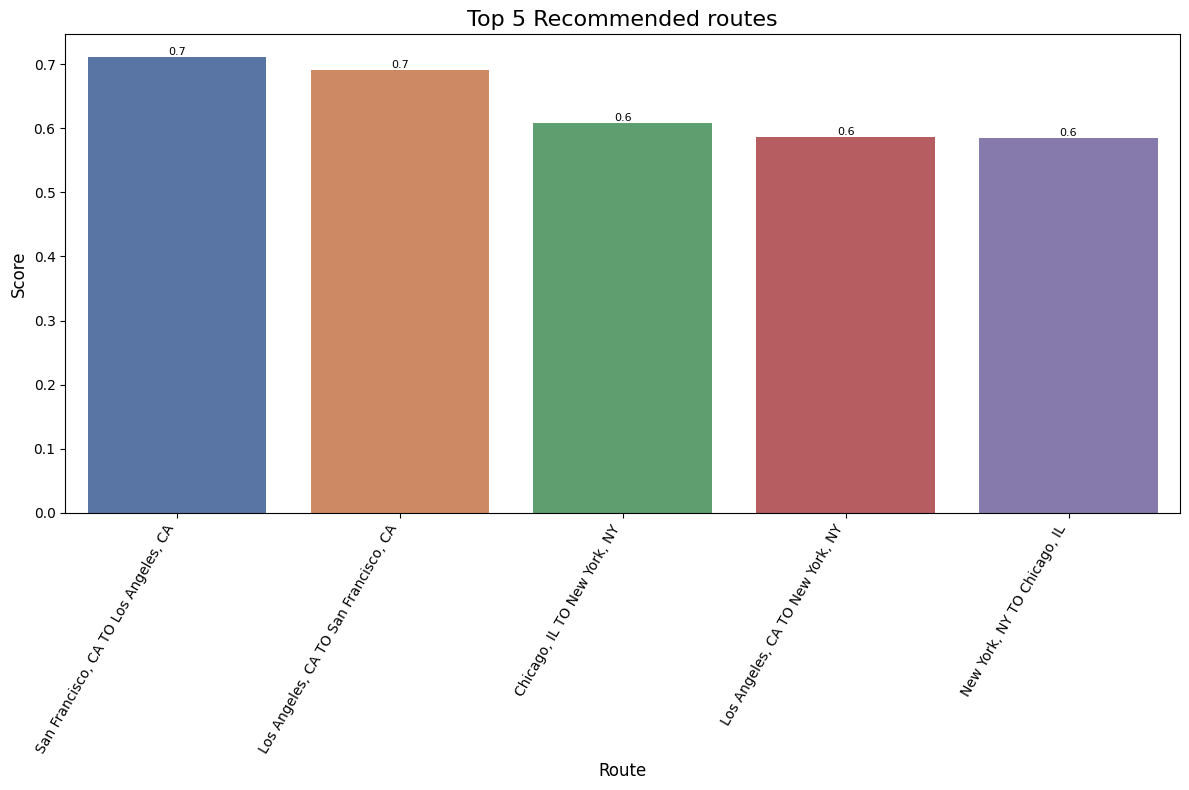

In [ ]:
# Sorting 'temp' by 'score' in descending order to get top 10 routes
top_routes = busy_routes_data.sort_values(by='score', ascending=False).head(5)

# Creating a bar chart using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='route', y='score', data=top_routes, palette='deep')
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)
ax.set_title('Top 5 Recommended routes', fontsize=16)

# Adding labels to the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.1f}',
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

plt.tight_layout()
plt.show()

#### 4) The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.

In [ ]:
top_routes=top_routes.assign(NUMBER_OF_TRIPS_TO_BREAKEVEN = lambda x: ((90000000/x['profit_per_trip'])))



top_routes.assign(NUMBER_OF_TRIPS_TO_BREAKEVEN = lambda x: ((90000000/x['profit_per_trip']))).to_excel('Final_Solution_4.xlsx')
print(top_routes)

     ORIGIN DESTINATION ORIGIN_STATE_NM  PASSENGERS  ITIN_FARE  \
4960    SFO         LAX      California       354.0   177364.0   
2839    LAX         SFO      California       291.0   143123.0   
3850    ORD         LGA        Illinois       463.0   247779.0   
2800    LAX         JFK      California       437.0   251706.0   
2941    LGA         ORD        New York       335.0   215649.0   

       ORIGIN_CITY_NAME     DEST_CITY_NAME  DEP_DELAY     ARR_DELAY  AIR_TIME  \
4960  San Francisco, CA    Los Angeles, CA   -14455.0 -35329.150001  233197.0   
2839    Los Angeles, CA  San Francisco, CA   -13391.0 -35107.500002  242188.0   
3850        Chicago, IL       New York, NY   -11058.0 -28177.100001  346840.0   
2800    Los Angeles, CA       New York, NY    -9272.0 -31184.650001  287739.0   
2941       New York, NY        Chicago, IL   -11883.0 -27593.700001  440166.0   

      ...          cost        profit  profit_per_trip busy_route  \
4960  ...  9.270531e+07 -2.982302e+07     -7141

In [ ]:
top_routes[['ITIN_FARE','DEP_DELAY','ARR_DELAY','total_count','cost','profit','total_delay','NUMBER_OF_TRIPS_TO_BREAKEVEN']]

,ITIN_FARE,DEP_DELAY,ARR_DELAY,total_count,cost,profit,total_delay,NUMBER_OF_TRIPS_TO_BREAKEVEN
4960,177364.0,-14455.0,-35329.150001,4176,9.270531e+07,-2.982302e+07,-49784.150001,-12602.346934
2839,143123.0,-13391.0,-35107.500002,4164,9.252461e+07,-5.078181e+07,-48498.500002,-7379.807378
3850,247779.0,-11058.0,-28177.100001,3580,9.274697e+07,2.205609e+07,-39235.100001,14608.209916
2800,251706.0,-9272.0,-31184.650001,3162,7.797037e+07,3.209745e+07,-40456.650001,8866.124954
2941,215649.0,-11883.0,-27593.700001,3576,9.262194e+07,-2.029833e+07,-39476.700001,-15855.492663


***By order of route***

- Route 1 SFO to LAX
- Route 2 LAX to SFO
- Route 3 ORD to LGA
- Route 4 LAX to JFK
- Route 5 LGA to ORD

#### 5) Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

1. Revenue and Profitability KPIs
  - Total Revenue per Route: Measures overall income from ticket sales, baggage fees, and ancillary services.
  - Profit Margin per Route: Tracks the percentage of profit relative to total revenue to ensure financial viability.
  - Revenue per Available Seat Mile: Assesses how effectively the available seat capacity is generating revenue.

2. Operational Efficiency KPIs
  - Load Factor: The percentage of available seats filled by paying passengers. A high load factor indicates effective utilization of capacity.
  - On-Time Performance: The percentage of flights departing and arriving on time, critical for customer satisfaction and cost control.
  - Cost per Available Seat Mile: Evaluates cost efficiency by measuring operating costs per available seat mile.

3. Customer Experience KPIs
  - Net Promoter Score: Gauges customer satisfaction and likelihood of recommending the airline.
  - Average Delay Duration: Tracks delays per route, influencing customer satisfaction and operational costs.

4. Market Share and Growth KPIs
  - Passenger Yield: Revenue generated per paying passenger, useful for assessing pricing strategies.
  - Route Market Share: The airlines share of total passengers on the recommended routes compared to competitors.


By regularly monitoring these KPIs, we can identify strengths, address weaknesses, and make data-driven adjustments to optimize route performance.